# Pymaceuticals Inc.
---

### Analysis

- In the data below we were looking at combined data sheets of mouse studies that looked at the effect of different drug treatments to reduce tumor size for each mouse. In the first few cells we combine the data(from two csv sheets) and make them into one dataframe and remove a duplicate mouse date giving us a "clean sheet/dataframe". The next area is a summary of statistics comparing drug regimen and the effect of tumor size. Finally we look at individual drugs, using the statistical data in the previous cells to create bar, pie, box plots, line, and scatterplots to highlight the usefulness of drugs.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_complete = pd.merge(study_results, mouse_metadata, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pharma_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = len(pharma_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = pharma_complete.loc[pharma_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = pharma_complete[pharma_complete["Mouse ID"]=='g989']
mouse_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pharma_complete.drop(pharma_complete[pharma_complete["Mouse ID"]=='g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = tumor_volume.mean()
median = tumor_volume.median()
variance = tumor_volume.var()
std = tumor_volume.std()
sem = tumor_volume.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_combined = pd.DataFrame({"Drug Regimen":mean.index,"Mean Tumor Volume":mean.values, 
                                      "Median Tumor Volume":median.values,"Tumor Volume Variance":variance.values,
                                    "Tumor Volume Std. Dev.":std.values,"Tumor Volume Std. Err.":sem.values})

tumor_volume_data = tumor_volume_combined.set_index("Drug Regimen")
tumor_volume_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_data_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median","var", "std", "sem"])
tumor_volume_data_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

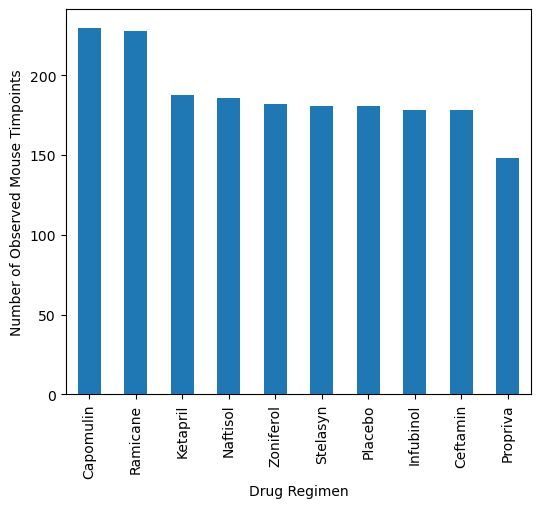

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize=(6, 5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timpoints")
plt.show()

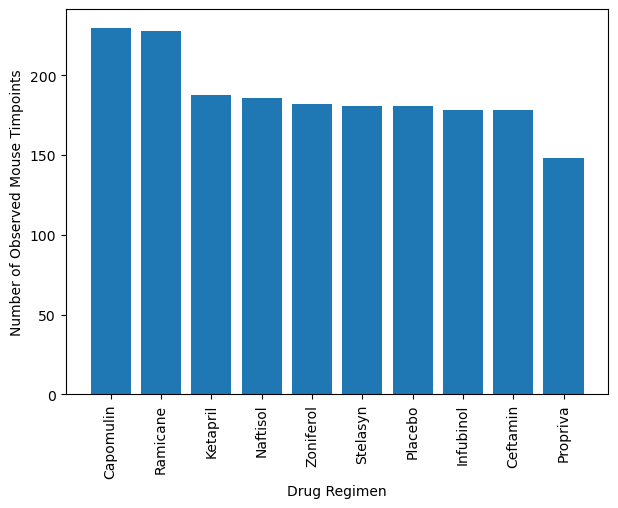

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()

drug_regimens = regimen_counts.index
counts = regimen_counts.values
plt.figure(figsize=(7, 5))
plt.bar(drug_regimens, counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timpoints')
plt.xticks(rotation=90)
plt.show()

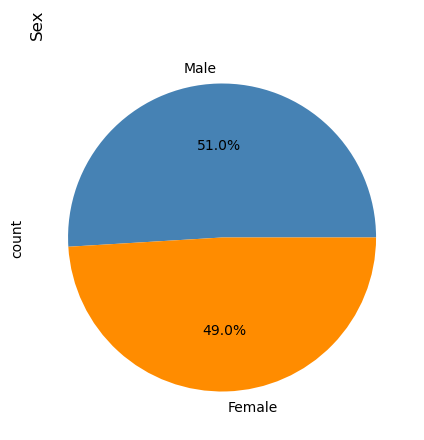

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'], figsize=(5, 5))
plt.title('Sex', rotation=90, loc='left')
plt.show()

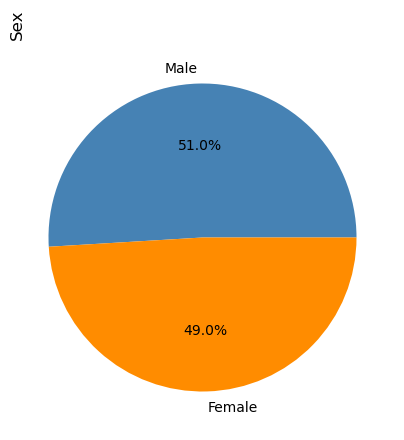

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts()
sex = sex_counts.index
counts = sex_counts.values
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=sex, autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'])
plt.title('Sex',rotation=90, loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each regimen
tumor_volume_data = []

# Loop through the selected regimens
for regimen in selected_regimens:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    regimen_data = clean_df[clean_df['Drug Regimen'] == regimen]
    max_timepoints = regimen_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
    merged_data = pd.merge(regimen_data, max_timepoints, on=['Mouse ID', 'Timepoint'], how='right')
    tumor_volume = merged_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{regimen}\'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


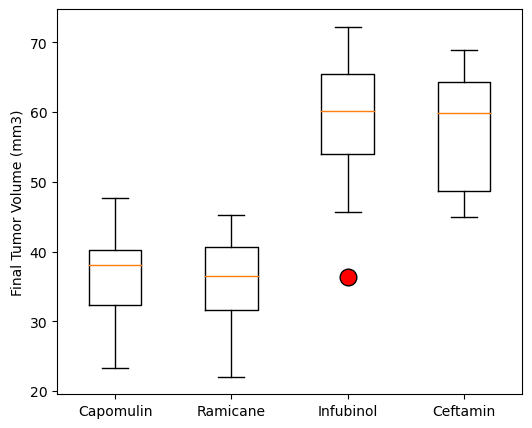

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5))
plt.boxplot(tumor_volume_data, labels=selected_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize':12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

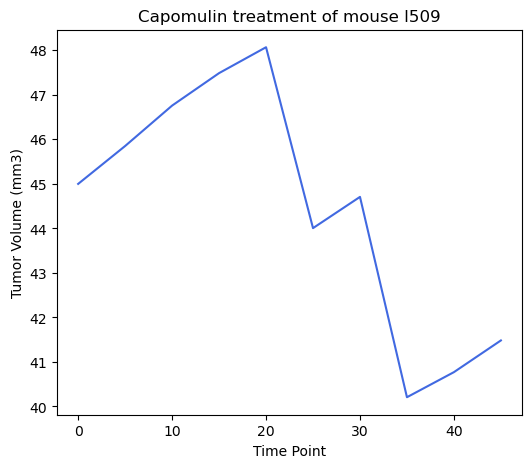

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
selected_mouse = 'l509'
mouse_data = capomulin_df.loc[capomulin_df['Mouse ID'] == selected_mouse]
plt.figure(figsize=(6, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='royalblue')
plt.title(f'Capomulin treatment of mouse {selected_mouse}')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

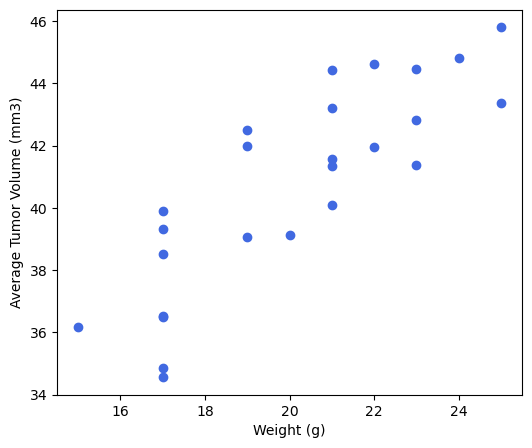

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
weight_vs_tumor_volume = pd.merge(average_tumor_volume, capomulin_df[['Mouse ID', 'Weight (g)']], on='Mouse ID')
weight_vs_tumor_volume = weight_vs_tumor_volume.drop_duplicates(subset='Mouse ID').reset_index()
plt.figure(figsize=(6, 5))
plt.scatter(weight_vs_tumor_volume['Weight (g)'], weight_vs_tumor_volume['Tumor Volume (mm3)'], marker='o', color='royalblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


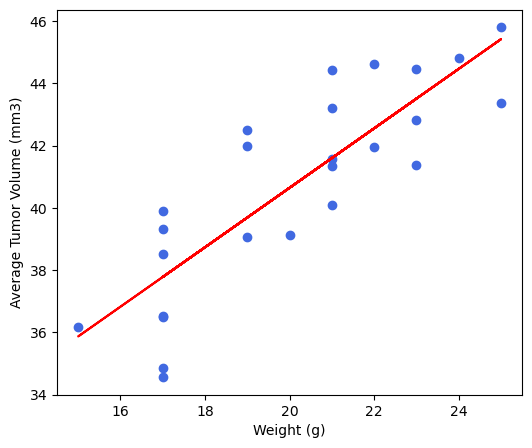

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
linreg_weight = weight_vs_tumor_volume['Weight (g)']
linreg_volume = average_tumor_volume['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = linregress(linreg_weight, linreg_volume)
regress_values = linreg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(linreg_weight,linreg_volume)
plt.figure(figsize=(6, 5))
plt.scatter(linreg_weight, weight_vs_tumor_volume['Tumor Volume (mm3)'], marker='o', color='royalblue')
plt.plot(linreg_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}')
plt.show()